# COVID-19 cases in Poços de Caldas

A repo for coronavirus related case count data from Poços de Caldas, MG, Brazil.

In [1]:
import pandas as pd
from matplotlib.dates import DateFormatter
from os import path
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import_from_web = False

# get data from the Healthy Department of the State of Minas Gerais
if import_from_web:
    try:
        df = pd.read_csv('https://www.saude.mg.gov.br/images/noticias_e_eventos/000_2020/coronavirus-dados-csv/notificacoes-covid19-mg.csv',
                         encoding = "ISO-8859-1",
                         dayfirst=True, 
                         sep=';',
                         parse_dates =['DATA_NOTIFICACAO', 'DATA_ATUALIZACAO']
                        )
        df.to_csv(path.join('data', 'notificacoes-covid19-mg.csv'))
        
    except:
        print('Error: unable to update the file.')


df = pd.read_csv(path.join('data', 'notificacoes-covid19-mg.csv'),
                     dayfirst=True,
                     parse_dates =['DATA_NOTIFICACAO', 'DATA_ATUALIZACAO']
                    )

# filtering the data related to Poços de Caldas
city = 'POÇOS DE CALDAS'
df_city = df[df['MUNICIPIO_RESIDENCIA'] == city].sort_values(by=['DATA_NOTIFICACAO']).reset_index().drop(['index'], axis=1)

## Confirmed Cases - State Dataset

In [2]:
# organizing the data
df_conf = df_city['DATA_NOTIFICACAO'].value_counts().rename_axis(['DATA_NOTIFICACAO']).reset_index(name='NOVOS_CASOS').sort_values('DATA_NOTIFICACAO')
df_conf = df_conf.reset_index().drop(['index'], axis=1)

# add cumulative cases column
df_conf['CONFIRMADOS'] = df_conf['NOVOS_CASOS'].cumsum()

# exporting a csv file
df_conf.to_csv(path.join('data', 'PC-COVID19-Total-Confirmed-Cases.csv'))

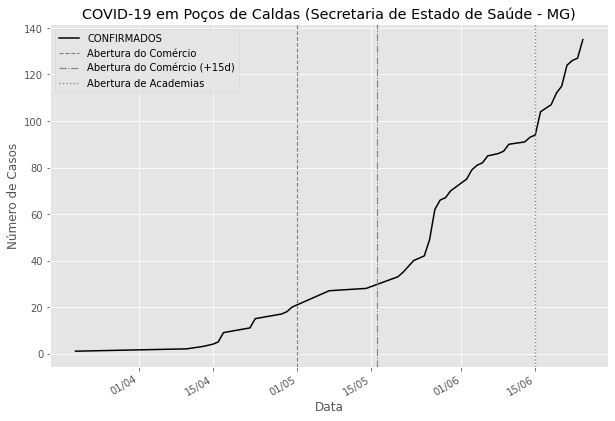

In [3]:
plt_conf = df_conf.plot.line(x='DATA_NOTIFICACAO',y='CONFIRMADOS',color="black",
                                              figsize=(10,7))

plt_conf.axvline("2020-05-01",label='Abertura do Comércio',  color="gray", lw=1.1, linestyle="--")
plt_conf.axvline("2020-05-16",label='Abertura do Comércio (+15d)', color="gray", lw=1.1, linestyle="-.")
plt_conf.axvline("2020-06-15",label='Abertura de Academias', color="gray", lw=1.3, linestyle=":")

plt_conf.xaxis.set_major_formatter(DateFormatter('%d/%m'))
plt_conf.set_ylabel("Número de Casos")
plt_conf.set_xlabel("Data")
plt_conf.set_title("COVID-19 em Poços de Caldas (Secretaria de Estado de Saúde - MG)")
plt_conf.legend()
plt_conf.get_figure().savefig(path.join('results','graph_confirmed_cases.png'), bbox_inches='tight')

## Confirmed Cases - State Dataset

In [4]:

df_bol = pd.read_csv(path.join('data', 'PC_boletins_data.csv'),
                     dayfirst=True,
                     parse_dates =['Data']
                    )

#df_bol = df_bol[df_bol['Confirmados']>0]

df_bol['Infectados'] = df_bol['Confirmados']-df_bol['Recuperados']-df_bol['Óbitos']
df_bol['Novos Confirmados'] = df_bol['Confirmados']-df_bol['Confirmados'].shift()
df_bol['Novos Recuperados'] = df_bol['Recuperados']-df_bol['Recuperados'].shift()
df_bol['Novos Óbitos'] = df_bol['Óbitos']-df_bol['Óbitos'].shift()


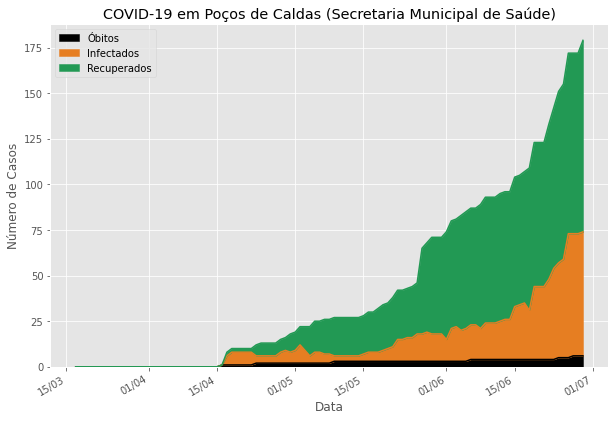

In [5]:
plt_bol = df_bol.plot.area(x='Data',y=['Óbitos','Infectados','Recuperados'],
                           color=["black","#E67E22","#229954"],
                           figsize=(10,7))

plt_bol.xaxis.set_major_formatter(DateFormatter('%d/%m'))
plt_bol.set_ylabel("Número de Casos")
plt_bol.set_xlabel("Data")
plt_bol.set_title("COVID-19 em Poços de Caldas (Secretaria Municipal de Saúde)")
plt_bol.legend()
plt_bol.get_figure().savefig('results/covid_cases_area_plot.png')

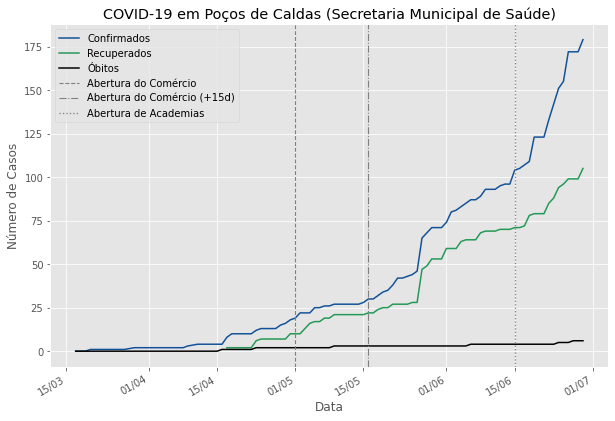

In [6]:
plt_bol = df_bol.plot.line(x='Data',y=['Confirmados','Recuperados','Óbitos'],color=["#125198","#229954","black"],
                                              figsize=(10,7))


plt_bol.axvline("2020-05-01",label='Abertura do Comércio',  color="gray", lw=1.1, linestyle="--")
plt_bol.axvline("2020-05-16",label='Abertura do Comércio (+15d)', color="gray", lw=1.1, linestyle="-.")
plt_bol.axvline("2020-06-15",label='Abertura de Academias', color="gray", lw=1.3, linestyle=":")

plt_bol.xaxis.set_major_formatter(DateFormatter('%d/%m'))
plt_bol.set_ylabel("Número de Casos")
plt_bol.set_xlabel("Data")
plt_bol.set_title("COVID-19 em Poços de Caldas (Secretaria Municipal de Saúde)")
plt_bol.legend()
plt_bol.get_figure().savefig('results/covid_cases_line_plot.png')